# **Lab 2**
# **Вариационное Исчисление**
# **Задача с подвижными концами**

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sp.init_printing()

## Исходные данные:

In [2]:
t, λ0, λ1, C1, C2 = sp.symbols('t λ0 λ1 C1 C2')
x = sp.Function('x')(t)
Dx = x.diff(t)
t0, t2 = (0, 2)

## Подынтегральная функция

In [3]:
L = λ0 * (4 * x * sp.sin(t) - Dx**2 - x**2)
L

## терминант

In [4]:
l = λ0 * x.subs(t, t2)**2 + λ1 * (x.subs(t, t0) - 1)
l

## Вычислим частные произвoдные:

In [5]:
Lx = L.diff(x)
Lx

In [6]:
LDx = L.diff(Dx)
LDx

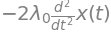

In [7]:
LDx_dt = LDx.diff(t)
LDx_dt

In [8]:
lx_0 = l.diff(x.subs(t, t0))
lx_0

In [9]:
lx_2 = l.diff(x.subs(t, t2))
lx_2

## Запишем условие стационарности, уравнение Эйлера и его решение:

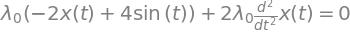

In [10]:
Euler = sp.Eq(-LDx_dt + Lx, 0)
Euler

### Общее решение

In [11]:
Euler_sol = sp.dsolve(Euler)
Euler_sol

### Вычислим произвoдное общего решения

In [12]:
Euler_sol_Dx = Euler_sol.rhs.diff(t)
Euler_sol_Dx

## Запишем условие трансверсальности:

In [13]:
eq_0 = sp.Eq(LDx.subs(t, t0), lx_0)
eq_0

      ⎛d       ⎞│        
-2⋅λ₀⋅⎜──(x(t))⎟│    = λ₁
      ⎝dt      ⎠│t=0     

In [14]:
eq_2 = sp.Eq(LDx.subs(t, t2), -lx_2)
eq_2

      ⎛d       ⎞│                
-2⋅λ₀⋅⎜──(x(t))⎟│    = -2⋅λ₀⋅x(2)
      ⎝dt      ⎠│t=2             

## Запишем условие связи:

In [15]:
ics = {t: t0, x: 1}
ics

## Подставим граничные условия t0 = 0 и x(t0) = 1 в найденное общее решение и находим значение С2

In [16]:
C2_val = sp.solve(Euler_sol, C2)[0].subs(ics)
C2_val

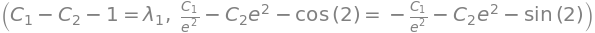

In [17]:
λ0 = sp.S(1) / 2
eq_transv_0 = sp.Eq(-2 * λ0 * Euler_sol_Dx.subs(t, t0), lx_0)
eq_transv_2 = sp.Eq(-2 * λ0 * Euler_sol_Dx.subs(t, t2), -2 * λ0 * Euler_sol.rhs.subs(t, t2))
eq_transv_0, eq_transv_2

In [18]:
C1_val = sp.solve(eq_transv_2, C1)[0]
C1_val

In [19]:
C2_val = C2_val.subs(C1, C1_val)
C2_val

In [20]:
C1_C2 = {C1: C1_val, C2: C2_val}
C1_C2

In [21]:
λ1 = sp.solve(eq_transv_0.subs(C1_C2), λ1)[0]
λ1

## Подставим значения С1 и С2 в найденное общее решение и получим допустимую экстремаль

In [22]:
x_extremal = Euler_sol.subs(C1_C2)
x_extremal

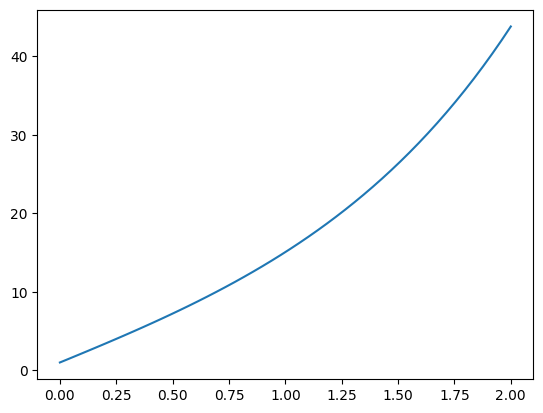

In [23]:
xpl = np.linspace(t0, t2)
x20 = sp.lambdify(t, x_extremal.rhs)
x20 = x20(xpl)

plt.plot(xpl, x20)
plt.show()